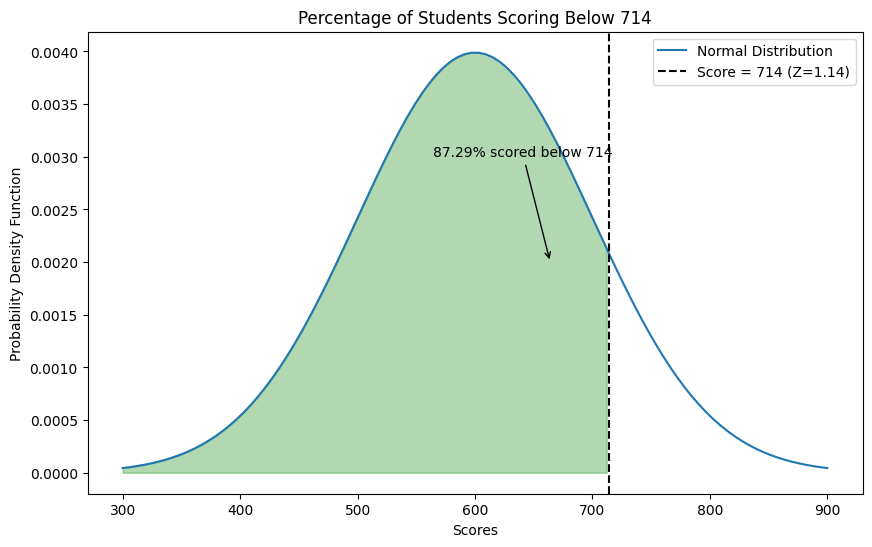

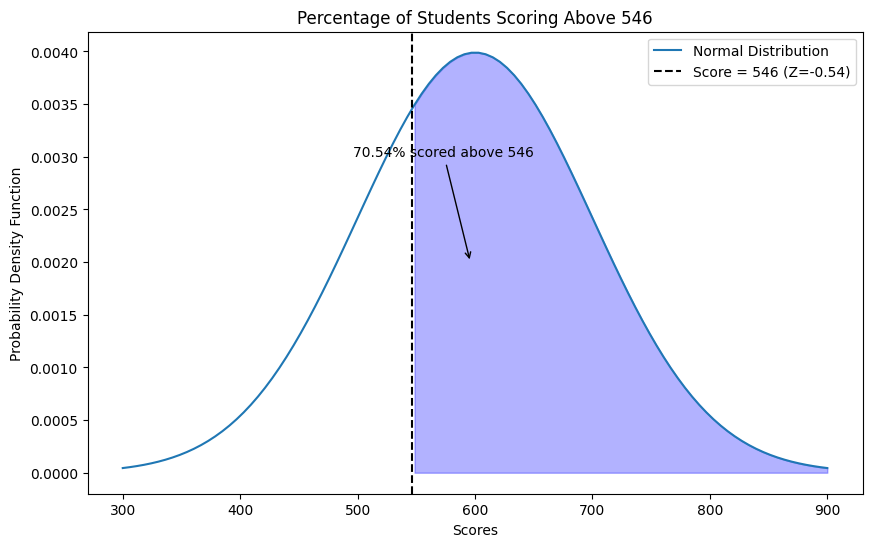

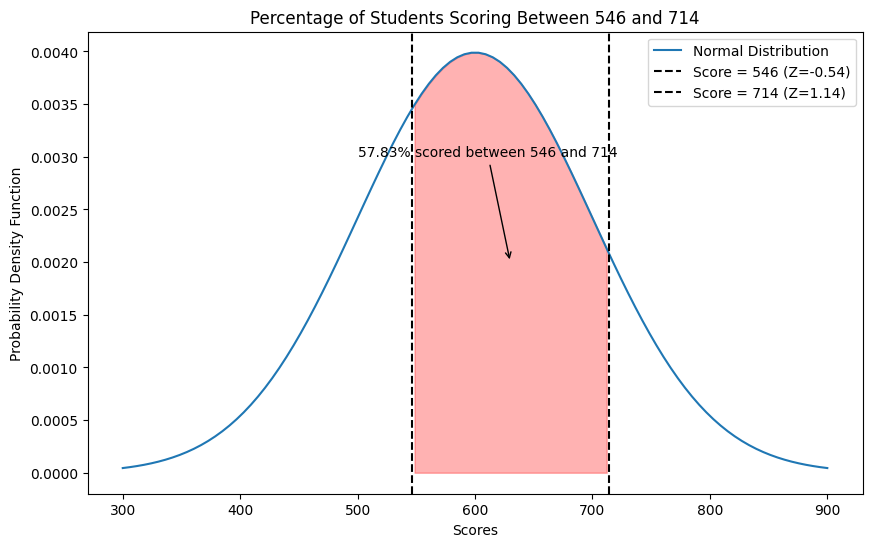

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# General data
mu = 600  # Mean
sigma = 100  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Function to create annotated plots
def create_annotated_plot(x, mu, sigma, score, z_score, title, color, text, area_below=True):
    plt.figure(figsize=(10, 6))
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
    plt.axvline(score, color='black', linestyle='--', label=f'Score = {score} (Z={z_score:.2f})')

    # Highlighting the relevant area
    if area_below:
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x < score), color=color, alpha=0.3)
        annotation_point = score - 50
    else:
        plt.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x > score), color=color, alpha=0.3)
        annotation_point = score + 50

    # Annotations
    plt.title(title)
    plt.xlabel('Scores')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.annotate(text, xy=(annotation_point, 0.002), xytext=(annotation_point - 100, 0.003),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.show()

# Calculations for z-scores and probabilities
z1 = (714 - mu) / sigma
z2 = (546 - mu) / sigma
p_below_714 = stats.norm.cdf(z1)
p_above_546 = 1 - stats.norm.cdf(z2)
p_between = p_below_714 - (1 - p_above_546)

# Problem 3: Percentage of students scoring below 714
create_annotated_plot(x, mu, sigma, 714, z1, 'Percentage of Students Scoring Below 714', 'green',
                      f'{p_below_714:.2%} scored below 714')

# Problem 4: Percentage of students scoring above 546
create_annotated_plot(x, mu, sigma, 546, z2, 'Percentage of Students Scoring Above 546', 'blue',
                      f'{p_above_546:.2%} scored above 546', area_below=False)

# Problem 5: Percentage of students scoring between 546 and 714
plt.figure(figsize=(10, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
plt.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x > 546) & (x < 714), color='red', alpha=0.3)
plt.axvline(546, color='black', linestyle='--', label=f'Score = 546 (Z={z2:.2f})')
plt.axvline(714, color='black', linestyle='--', label=f'Score = 714 (Z={z1:.2f})')
plt.title('Percentage of Students Scoring Between 546 and 714')
plt.xlabel('Scores')
plt.ylabel('Probability Density Function')
plt.legend()
plt.annotate(f'{p_between:.2%} scored between 546 and 714', xy=(630, 0.002), xytext=(500, 0.003),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()


